### 1. 明确目的并加载数据

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

input/test.csv
input/trainLabels.csv
input/train.csv


### 2. 数据的可视化和概括

In [2]:
df_train = pd.read_csv("input/train.csv",header=None)
df_test = pd.read_csv("input/test.csv",header=None)
df_labels = pd.read_csv("input/trainLabels.csv",header=None)
print(df_train.shape,df_test.shape,df_labels.shape)
print('--------')
#print(df_labels)

(1000, 40) (9000, 40) (1000, 1)
--------


In [3]:
df_train.head(5)

0         1         2         3         4         5         6   \
0  0.299403 -1.226624  1.498425 -1.176150  5.289853  0.208297  2.404498   
1 -1.174176  0.332157  0.949919 -1.285328  2.199061 -0.151268 -0.427039   
2  1.192222 -0.414371  0.067054 -2.233568  3.658881  0.089007  0.203439   
3  1.573270 -0.580318 -0.866332 -0.603812  3.125716  0.870321 -0.161992   
4 -0.613071 -0.644204  1.112558 -0.032397  3.490142 -0.011935  1.443521   

         7         8         9   ...        30        31        32        33  \
0  1.594506 -0.051608  0.663234  ... -0.850465 -0.622990 -1.833057  0.293024   
1  2.619246 -0.765884 -0.093780  ... -0.819750  0.012037  2.038836  0.468579   
2 -4.219054 -1.184919 -1.240310  ... -0.604501  0.750054 -3.360521  0.856988   
3  4.499666  1.038741 -1.092716  ...  1.022959  1.275598 -3.480110 -1.065252   
4 -4.290282 -1.761308  0.807652  ...  0.513906 -1.803473  0.518579 -0.205029   

         34        35        36        37        38        39  
0  3.552681  0.717611  3.305972 -2.715559 -2.682409  0.101050  
1 -0.517657  0.422326  0.803699  1.213219  1.382932 -1.817761  
2 -2.751451 -1.582735  1.672246  0.656438 -0.932473  2.987436  
3  2.153133  1.563539  2.767117  0.215748  0.619645  1.883397  
4 -4.744566 -1.520015  1.830651  0.870772 -1.894609  0.408332  

[5 rows x 40 columns]

In [4]:
df_labels.head(5)

0
0  1
1  0
2  0
3  1
4  0

In [5]:
print(df_train.describe())#描述数据
print(df_train.dtypes) #查看数据类型

                0            1            2            3            4   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.025596    -0.024526    -0.024088    -0.002271     1.092329   
std       1.008282     1.016298     0.979109     0.970575     4.538834   
min      -3.365711    -3.492086    -2.695602    -3.460471   -16.421901   
25%      -0.669010    -0.693937    -0.698830    -0.617557    -1.801997   
50%       0.027895    -0.033194     0.008145     0.002327     0.862818   
75%       0.762520     0.682753     0.661434     0.640743     3.843172   
max       3.326246     3.583870     2.546507     3.088738    17.565345   

                5            6            7            8            9   ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean     -0.006250     0.497342    -0.037883     0.026391    -0.003597  ...   
std       0.989128     2.118819     2.232256     1.001064     1.013520  ...   
min      -3.04125

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_train,df_labels,random_state=1)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(750, 40) (750, 1)
(250, 40) (250, 1)


### 3. 对模型进行评估并选择最优模型

机器学习模型

逻辑回归

In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.82

决策树

In [8]:
from sklearn.tree import DecisionTreeClassifier

tr = DecisionTreeClassifier().fit(X_train,y_train)
tr.score(X_test,y_test)

0.732

支持向量机

In [9]:
from sklearn.svm import SVC
svm = SVC().fit(X_train,y_train)
svm.score(X_test,y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.908

高斯贝叶斯

In [10]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train,y_train)
gnb.score(X_test,y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.82

线性判别分析

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

lda = LinearDiscriminantAnalysis().fit(X_train,y_train)
lda.score(X_test,y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.828

knn算法

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train,y_train)
knn.score(X_test,y_test)

<ipython-input-12-78a760ed76d8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn = KNeighborsClassifier().fit(X_train,y_train)


0.884

随机森林

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train,y_train)
rf.score(X_test,y_test)

<ipython-input-13-958b149b0c1a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier().fit(X_train,y_train)


0.892

xgboost

In [14]:
from xgboost import XGBClassifier

xgb = XGBClassifier().fit(X_train,y_train)
xgb.score(X_test,y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.892

对模型进行评估

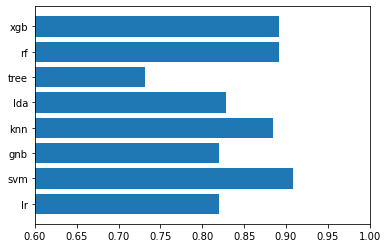

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

def score(model):
    return model.score(X_test,y_test)
    
x = ['lr','svm','gnb','knn','lda','tree','rf','xgb']
y = [score(lr),score(svm),score(gnb),score(knn),score(lda),score(tr),score(rf),score(xgb)]

plt.barh(x,y)
plt.xlim(0.6,1.0)
plt.show()

从上面可以看到svm精确度最高

### 选出最优模型并进行训练预测

In [16]:
model = SVC().fit(df_train,df_labels)
pred = model.predict(df_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [17]:
print(pred.shape)
pred[0:10]

(9000,)


array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

### 得到最终结果

In [18]:
submit = pd.DataFrame({
    'Id':range(1,9001),
    'Solution':pred
}
)
submit.head(5)

Id  Solution
0   1         1
1   2         0
2   3         1
3   4         0
4   5         0

In [19]:
submit.to_csv('submit.csv',index=False)